In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from speech_modeling import h_input, h_model
import pandas as pd
import os

In [3]:
df = pd.read_csv(os.path.join('data', 'gmu-results.csv'), low_memory=False)
input_data = h_input(df)
input_data.process('country')
input_data.select_features(selected_features=['F1', 'F2'])
input_data.select_places(places=['uk', 'usa'])
input_data.output_input_df(os.path.join('data', 'gmu-input_df.csv'))
input_data.normalize(method='z')
input_data.calculate_vif(filename=os.path.join('data', 'gmu-uk-vif.csv'))
print("Completed")

Completed


In [4]:
model_data = input_data.input_df.copy()
model_features = list(input_data.input_df.columns[4:])
m = h_model(data=model_data, features=model_features, y_feature="location", y_main="uk")
m.fit(model_type="rforest", cv_method="LOO", var_imp_type="mdi")
m.output_importances(os.path.join('data', 'gmu-uk-mdi.csv'))


Fitting model of type rforest
Fitting LOOCV split 0
Fitting LOOCV split 10
Fitting LOOCV split 20
Fitting LOOCV split 30
Fitting LOOCV split 40
Fitting LOOCV split 50
Fitting LOOCV split 60
Fitting LOOCV split 70
Fitting LOOCV split 80
Fitting LOOCV split 90
Fitting LOOCV split 100
Fitting LOOCV split 110
Fitting LOOCV split 120
Fitting LOOCV split 130
Learner 1 Accuracy: 0.955
Learner 1 Variable Importance Measures:
F1-call   0.076673
F2-ask    0.076646
F1-also   0.067177
F2-bob    0.054210
F2-and    0.046974
F1-bob    0.035935
F2-bags   0.024172
F1-frog   0.022098
F1-small  0.019353
F2-from   0.018737

Fitting model of type rforest
Fitting LOOCV split 0
Fitting LOOCV split 10
Fitting LOOCV split 20
Fitting LOOCV split 30
Fitting LOOCV split 40
Fitting LOOCV split 50
Fitting LOOCV split 60
Fitting LOOCV split 70
Fitting LOOCV split 80
Fitting LOOCV split 90
Fitting LOOCV split 100
Fitting LOOCV split 110
Fitting LOOCV split 120
Fitting LOOCV split 130
Learner 2 Accuracy: 0.917
Learne

In [5]:
m.var_imp.head()

,feature,mean,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6
1,F1-also,0.076688,0.067177,0.085331,0.093864,0.062473,0.095699,0.055583
58,F2-ask,0.071772,0.076646,0.062452,0.064868,0.073666,0.069473,0.083526
11,F1-call,0.063770,0.076673,0.058208,0.064048,0.050970,0.059407,0.073312
63,F2-bob,0.053462,0.054210,0.054596,0.059762,0.063037,0.033854,0.055311
57,F2-and,0.050660,0.046974,0.039574,0.054714,0.057001,0.062028,0.043668


In [6]:
m.sample_predict()

Predicted location: not uk


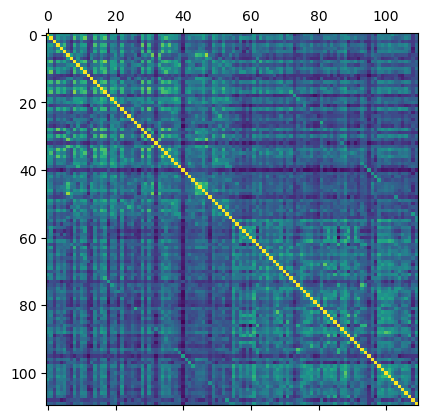

In [7]:
### Pearson Correlation Coefficients Graphed
import matplotlib.pyplot as plt
corr_df = pd.DataFrame(input_data.input_df, columns=model_features).corr()
fig = plt.matshow(corr_df)
plt.savefig(os.path.join("plots", "gmu-uk-corr_matrix"))
plt.show()
corr_df.to_csv(os.path.join("data", "gmu-uk-corr_df.csv"))